## Exploring Rossmann Drug Store Sales Data

In [1]:
import pandas as pd

data = pd.read_csv('../dataset/rossmann.csv', skipinitialspace=True, low_memory=False)

In [6]:
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# how many uinque stores are there in data set? It is 1115

data.Store.unique()
data.nunique()



Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64

Because we are most interested in the `Date` column that contains the date of sales for each store, we will make sure to process that as a `DateTime` type, and make that the index of our dataframe.

In [7]:
# convert date column (which is a string) to date-time column object

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# delete data-time column and instead have index column (that has same info). This done with intrue=True. It 
# is done for memory reasons
# now you can 

data['Year'] = data.index.year
data['Month'] = data.index.month

In [8]:
data.head()

# obviously data column is now gone ....

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [10]:
data['2014-05'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2014-05-31,1,6,4985,560,1,0,0,0,2014,5
2014-05-31,2,6,2953,485,1,0,0,0,2014,5
2014-05-31,3,6,4725,514,1,0,0,0,2014,5
2014-05-31,4,6,11018,1542,1,0,0,0,2014,5
2014-05-31,5,6,2026,235,1,0,0,0,2014,5


In [11]:
store1_data = data[data.Store == 1]

# we only want the data of the 1st store

### Data Exploration and MINEing

To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days.  On state holidays, the store is closed (and as a nice sanity check there are 0 sales), and on school holidays the sales are relatively similar.

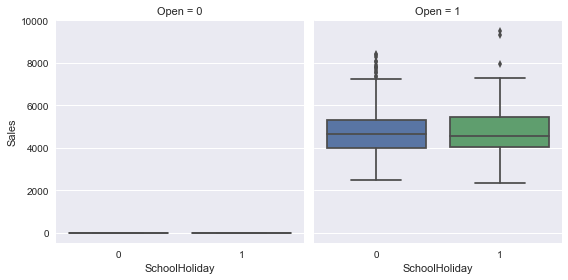

In [14]:
import seaborn as sb
%matplotlib inline

sb.factorplot(
    col='Open',
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

# comparing plot for school holiday vs not school holiday

> Check: See if there is a difference affecting sales on promotion days.

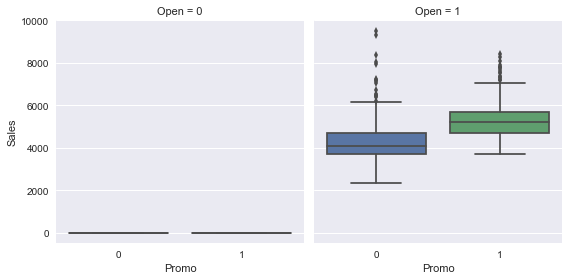

In [17]:
# TODO
sb.factorplot(
    col='Open',
    x='Promo',
    y='Sales',
    data=store1_data, 
    kind='box'
)

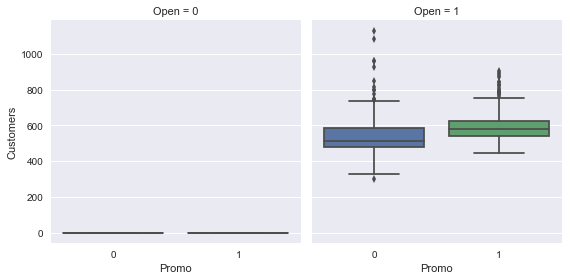

In [19]:
# check if number of customers is different for promo days or not

sb.factorplot(
    col='Open',
    x='Promo',
    y='Customers',
    data=store1_data, 
    kind='box'
)


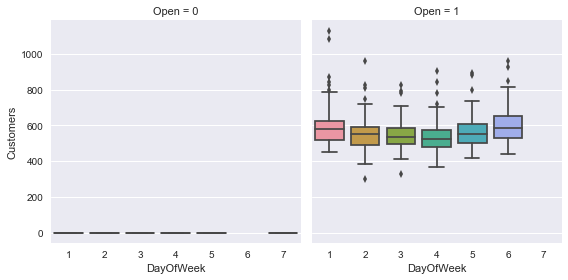

In [20]:
# Is there an effect of day of the week on sales. Note: saturday is always 
# closed (one of 7 days)

sb.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Customers',
    data=store1_data, 
    kind='box'
)

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

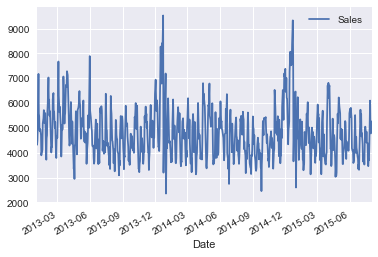

In [22]:
# Filter to days store 1 was open (so you remove days the store was closed)
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()

# this is why we made our indez a date time index; you can use the plot function better

# Note: if you use the plot function on "data" instead of "open_data" (as above) it also plots zero
# sales when the stores are closed

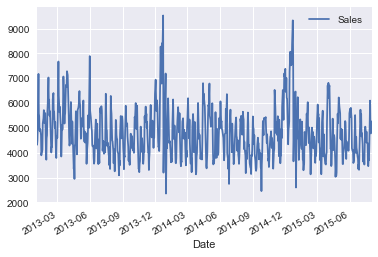

In [41]:
store1_open_data[['Sales']].plot()

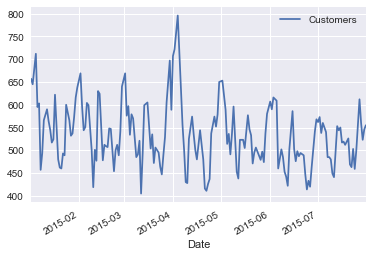

In [24]:
store1_open_data['2015'][['Customers']].plot()

# now you only look at 2015 and cutomer count

/Users/naumz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_median is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).median()
  if __name__ == '__main__':


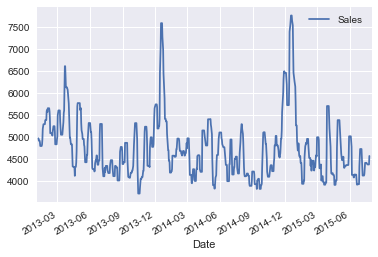

In [49]:
# start looking at rolling mean or median function

pd.rolling_median(store1_open_data[['Sales']], window=10, center=True).plot()

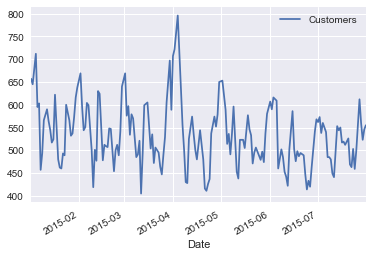

In [26]:
store_open_2015_data = store1_open_data['2015']
store_open_2015_data[['Customers']].plot()

In [30]:
store_open_2015_data.resample('D').mean().head(5)

# groups data over different time periods such as week, month, annual etcetera

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month
Date,,,,,,,,,
2015-01-02,1.0,5.0,5509.0,657.0,1.0,0.0,1.0,2015.0,1.0
2015-01-03,1.0,6.0,5023.0,645.0,1.0,0.0,1.0,2015.0,1.0
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,1.0,1.0,6239.0,712.0,1.0,1.0,1.0,2015.0,1.0
2015-01-06,1.0,2.0,4574.0,595.0,1.0,1.0,1.0,2015.0,1.0


In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


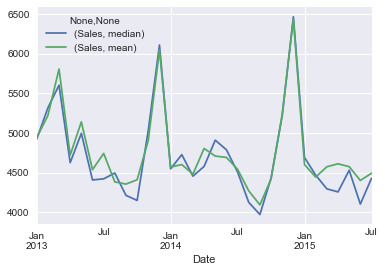

In [29]:
store1_open_data[['Sales']].resample('M', how=['median', 'mean']).plot()

In [23]:
store_open_2015_data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


### Data REFINING Using Time Series Statistics

### Autocorrelation

To measure how much the sales are correlated with each other, we want to compute the _autocorrelation_ of the 'Sales' column. In pandas, we do this we with the `autocorr` function:

`autocorr` takes one argument, the `lag` which is how many prio data points should be used to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it. Setting `lag` to 10 computes the correlation between every point and the point 10 days earlier.

In [16]:
data['Sales'].resample('D').mean().autocorr(lag=1)

# so this compares autocorrelation between one day and the day before. In this case it is 
# the average sales on a day for all stores

-0.025858276006383577

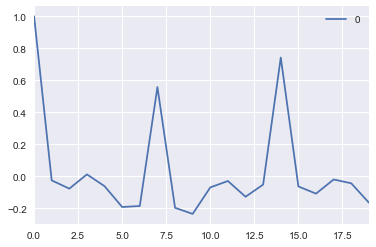

In [32]:
autoc = []

for i in range(20):
    autoc.append(data['Sales'].resample('D').mean().autocorr(lag=1*i))

df = pd.DataFrame(autoc)
df.plot()


### Rolling Averages

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates.  What were the mean and median sales for each month and year?

In Pandas, this is performed using the `resample` command, which is very similar to the `groupby` command. It allows us to group over different time intervals.

We can use `data.resample` and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - What aggregation to perform: 'mean', 'median', 'sum', etc.

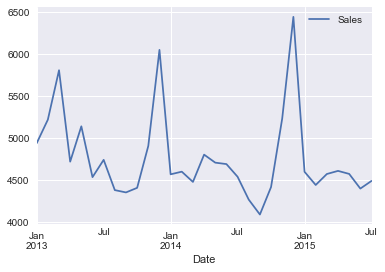

In [31]:
# this creates a discrete moving average by month (no overlap of data points)
# resampling simple aggregates data by month

data_store1_monthly = store1_open_data[['Sales']].resample('M').apply('mean')
data_store1_monthly[['Sales']].plot()


While identifying the monthly averages is useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps with a few days surrounding it. We can do this using rolling averages.

In pandas, we can compute rolling average using the `pd.rolling_mean` or `pd.rolling_median` functions.

In [11]:
data[['Sales']].resample('D').mean().rolling(window=3, center=True).mean().head()

,Sales
Date,
2013-01-01,NaN
2013-01-02,4004.475720
2013-01-03,5960.120478
2013-01-04,5661.694170
2013-01-05,3807.010762


`rolling_mean` (as well as `rolling_median`) takes these important parameters:
    - the first is the series to aggregate
    - `window` is the number of days to include in the average
    - `center` is whether the window should be centered on the date or use data prior to that date
    - `freq` is on what level to roll-up the averages to (as used in `resample`). Either `D` for day, `M` for month or `A` for year, etc.

Instead of plotting the full timeseries, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.

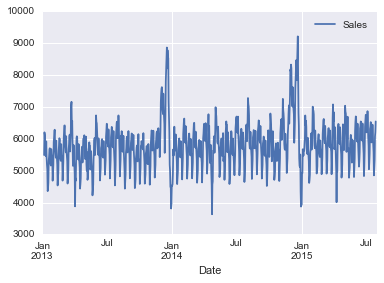

In [13]:
data[['Sales']].resample('D').mean().rolling(window=10, center=True).mean().plot()

### Pandas Window functions
Pandas `rolling_mean` and `rolling_median` are only two examples of Pandas window function capabilities. Window functions are operate on a set of N consecutive rows (a window) and produce an output.

In addition to `rolling_mean` and `rolling_median`, there are `rolling_sum`, `rolling_min`, `rolling_max`... and many more.

Another common one is `diff`, which takes the difference over time. `pd.diff` takes one arugment, `periods`, which is how many rows prior to use for the difference.


In [50]:
store1_data['Sales'].diff(periods=1).head()

Date
2015-07-31       NaN
2015-07-30    -243.0
2015-07-29    -238.0
2015-07-28     229.0
2015-07-27    1091.0
Name: Sales, dtype: float64

### Pandas expanding functions

In addition to the set of `rolling_*` functions, Pandas also provides a similar collection of `expanding_*` functions, which, instead of using a window of N values, use all values up until that time.

In [15]:
# computes the average sales, from the first date _until_ the date specified.
data[['Sales']].resample('D').mean().expanding().mean().head()


,Sales
Date,
2013-01-01,87.284560
2013-01-02,3160.157527
2013-01-03,4004.475720
2013-01-04,4491.911499
2013-01-05,4661.079513


## Exercises

# Plot the distribution of sales by month and compare the effect of promotions.

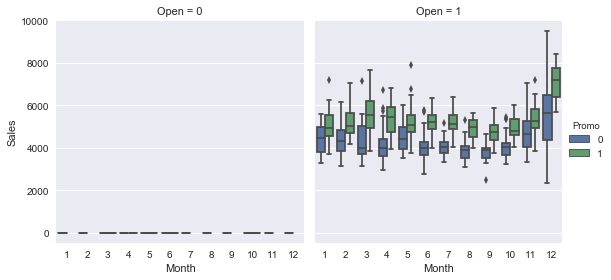

In [35]:
sb.factorplot(
    col='Open',
    x='Month',
    hue = 'Promo',
    y='Sales',
    data=store1_data, 
    kind='box'
)



> Are sales more correlated with the prior date, a similar date last year, or a similar date last month?

In [40]:

print data.Sales.resample('D').mean().autocorr(lag=1)
print data.Sales.resample('D').mean().autocorr(lag=30)
print data.Sales.resample('D').mean().autocorr(lag=364)

# autoc = []

# for i in range(365):
#    autoc.append(data['Sales'].resample('D').mean().autocorr(lag=1*i))

# df = pd.DataFrame(autoc)
# df.plot()

-0.0258582760064
-0.129842458225
0.756613221965


> Plot the 15 day rolling mean of customers in the stores

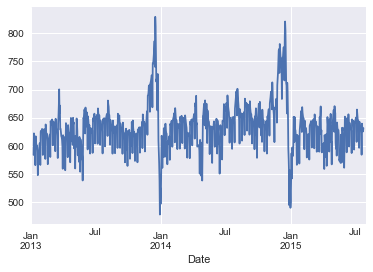

In [41]:
data.Customers.resample('D').mean().rolling(window=15, center=True).mean().plot()

# data['Customers'] is the same as data.Customers
# It is both a dataframe with only one column meaning it is a series. 
# Double brackets would keep it a data frame

> Identify the date with largest drop in sales from the same date in the previous month

In [44]:
data['Sales'].resample('D').mean().diff(periods=30).sort_values(ascending=False)

# You can also use .max

Date
2013-12-17    11533.074439
2014-12-23    11244.733690
2014-12-16    11141.825668
2015-06-30    10049.544395
2015-03-31     9860.063677
2013-12-03     9631.910314
2013-05-31     9607.985650
2014-04-15     9376.895067
2013-04-30     9317.197309
2014-12-02     9230.033155
2014-09-30     9218.079144
2014-01-07     9207.898655
2013-07-30     8800.295964
2015-06-02     8678.014350
2014-07-01     8575.515503
2014-11-04     8508.546524
2014-02-04     8490.194619
2015-06-16     8413.513004
2014-06-03     8404.495964
2014-04-29     8296.040359
2013-03-26     8203.092377
2014-11-25     8181.175401
2013-11-05     8151.818834
2015-04-28     8140.572197
2015-07-14     8135.311211
2014-06-17     8125.886996
2014-09-02     8108.755080
2013-12-16     8087.522870
2015-03-03     8080.147982
2014-03-04     8069.076233
                  ...     
2013-01-01             NaN
2013-01-02             NaN
2013-01-03             NaN
2013-01-04             NaN
2013-01-05             NaN
2013-01-06             

> Compute the total sales up until Dec. 2014

In [48]:
pd.expanding_sum(data[['Sales']].resample('D', how='sum'))['2014-12-31']

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.expanding_sum is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.expanding(min_periods=1).sum()
  """Entry point for launching an IPython kernel.


KeyError: '2014-12-31'

> When were the largest differences between 15-day moving/rolling averages?
> HINT: Using `rolling_mean` and `diff`

In [49]:
pd.rolling_mean(data[['Sales']].resample('D',how='mean'), window = 15, freq = 'D').diff(periods = 1).sort_values(ascending= false)

                                                          
# data['Sales'].resample('D').mean().rolling(window=15, center=True).diff(periods=30).sort_values(ascending=False)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.
/Applications/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:6050: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis, closed=closed)
/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(freq=D,window=15,center=False).mean()
  """Entry point for launching an IPython kernel.


NameError: name 'false' is not defined